# **1.1 FINANCIAL INCLUSION IN KENYA, RWANDA, TANZANIA & UGANDA**

### **Research question**
What are the demographic factors that influence whether or not a person has or uses a bank account?

We examine the factors that are significant, either negatively or positively, in order to determine their relationship with the dependent variable (has a bank account or not).

### **Defining the metric for success**
*   Determine the factors that determine Financial inclusion in the countries: Kenya, Uganda, Rwanda, Tanzania.
*   Prediction of individuals most likely to have or use a bank account or not.

### **Understanding the context**
Financial inclusion remains one of the major impediments to Africa's economic and human growth. Despite the rise of innovative fintech solutions and the expansion of mobile money in Africa, banks continue to play a critical role in facilitating access to financial services. Bank accounts allow households to save and make payments more easily, while also assisting businesses in improving their creditworthiness and gaining access to additional financial services.
As a result, having access to a bank account is critical for long-term economic growth.
### **Recording the Experimental Design**
•	Loading dataset

•	Checking the dataset's shape, top, bottom, datatypes

•	External data source validation

•	Data Cleaning

•	Renaming column names & ensuring consistency in column names

•	Dropping unnecessary columns

•	Handling null values, duplicated records, outliers, anomalies

•	Exploratory Data Analysis

•	Univariate EDA

•	Bivariate EDA

•	Multivariate EDA


### **Data Relevance**
The available data is relevant because it contains all of the variables needed to perform analysis by country and by demographic factors such as age, gender, level of education,location, employment, and relationship status, among other things that influence an individual's financial outcomes.







# **1.2 Importing Libraries for our Exploratory Data Analysis**

In [1]:
# Importing Libraries that will be used in our Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.3 Reading the data**

In [2]:
# Loading the Dataset from the source i.e. csv
# Loading the Dataset that describes the dataset.

variable_df =  pd.read_csv('/content/VariableDefinitions.csv')

In [3]:
# Loading the Financial Dataset 

finance_df = pd.read_csv('/content/Financial Dataset - 1.csv')

# **1.4 Checking the Data**

### 1.4.1 Previewing the variable definitions dataset

In [4]:
# Previewing the Variable dataset
variable_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 1.4.2 Previewing the Financial dataset

In [5]:
# Determining the no. of records in our Financial dataset
finance_df.shape

(23524, 13)

Our dataset has 23524 rows and 13 columns


In [6]:
# Previewing the top of our dataset

finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Previewing the bottom of our dataset

finance_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
# Checking whether each column has an appropriate datatype

finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# **1.5 External Data Validation**

The data available for analysis can be validated with the following [data](https://www.kaggle.com/c/datasciencenigeria/data) from Kaggle.

This data was compiled to analyse and predict the performances of Nigeria student academic performance based on the demographic information available.

Some of the demographic factors that were compiled for analysis include: student's gender, parents'level of education,area of residence, student's age.

All these are very similar to what we have in our data so we can move on with analysis since we have the right data to answer our question.

# **1.6 Tidying the dataset**

### 1.6.1 Renaming columns

Using the same pattern for column names, i.e. using lower case and '_' to make a single word for two-word columns.

In [9]:
# Using the same format for all column names by:
# Renaming the columns to combine the names of the columns into a single word and lowering the case

finance_df.columns = finance_df.columns.str.lower().str.replace(' ', '_')

In [10]:
# Renaming columns 
finance_df.rename(columns={'the_relathip_with_head': 'relationship_with_head', 'level_of_educuation':'level_of_education'}, inplace = True)

finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# Replacing column values  for the level of education column

finance_df["level_of_education"].replace({'Secondary education': 'Secondary', 'Primary education': "Primary",'Tertiary education':'Tertiary','Other/Dont know/RTA':'Other','Vocational/Specialised training':'Vocational'}, inplace=True)


### 1.6.2 Identifying uniques values within the dataset for each column.

In [12]:
# Are there any unique values in each column entry in the dataset?
for i in finance_df.columns:
 print(finance_df[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


[2018 2029 2056 2016 2039 2017]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No' nan]


['Rural' 'Urban' nan]


['Yes' 'No' nan]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]


['Female' 'Male' nan]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]


['Secondary

### 1.6.3 Dropping Irrelevant Fields

Dropping the fields unique id and year because they are irrelevant to our analysis.


In [13]:
# Dropping irrelevant fields
finance_df.drop(columns =['year', 'uniqueid'],inplace = True)
finance_df.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary,Informally employed


In [14]:
# Determining the number of items in each column and the data type of each column
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   has_a_bank_account      23488 non-null  object 
 2   type_of_location        23509 non-null  object 
 3   cell_phone_access       23513 non-null  object 
 4   household_size          23496 non-null  float64
 5   respondent_age          23490 non-null  float64
 6   gender_of_respondent    23490 non-null  object 
 7   relationship_with_head  23520 non-null  object 
 8   marital_status          23492 non-null  object 
 9   level_of_education      23495 non-null  object 
 10  type_of_job             23494 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.0+ MB


### 1.6.4 Missing Values

Identifying and dealing with missing values within the dataset.

In [15]:
# Identifying the Missing Data.
finance_df.isnull().sum()

country                   14
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64

In [16]:
# Dropping any rows that have a missing or null values because they may cause inconsistencies.
finance_df.dropna(inplace = True)
# Checking if there are any null values.
finance_df.isnull().sum() 

country                   0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64

Identifying uniques values within the dataset for each column.

In [17]:
# Are there any unique values in each column entry in the dataset?
for i in finance_df.columns:
 print(finance_df[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary' 'No formal education' 'Vocational' 'Primary' 'Tertiary'
 'Other' '6']


['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'F

### 1.6.5 Outliers

Identifying and dealing with outliers within our dataset.

(23343, 11)


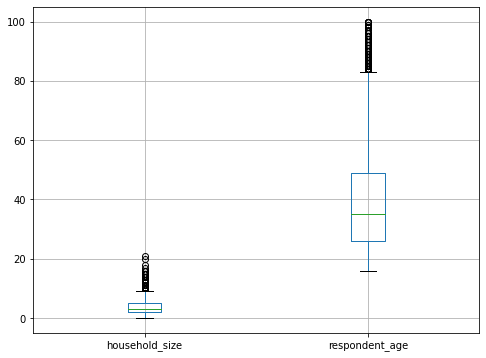

In [18]:
# checking for outliers 
finance_df.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(finance_df.shape)

In [19]:
# Checking for outliers in the household_size column

Q1 = finance_df.household_size.quantile(0.25)
Q3 = finance_df.household_size.quantile(0.75)

IQR = Q3 - Q1

outliers = ((finance_df.household_size < Q1 - 1.5 * IQR) | (finance_df.household_size > Q3 + 1.5 * IQR))
outliers.value_counts()

False    22967
True       376
Name: household_size, dtype: int64

There are 376 outliers in the household size column.However, removing the outliers would result in an inconclusive result because they could still be viable submissions.

In [20]:
# Checking for outliers in the respondent age column

Q1 = finance_df.respondent_age.quantile(0.25)
Q3 = finance_df.respondent_age.quantile(0.75)

IQR = Q3 - Q1

outliers = ((finance_df.respondent_age < Q1 - 1.5 * IQR) | (finance_df.respondent_age > Q3 + 1.5 * IQR))
outliers.value_counts()

False    23104
True       239
Name: respondent_age, dtype: int64

There are 239 outliers in the respondent age column.However, removing the outliers would result in an inconclusive result because they could still be viable submissions.

In [21]:
# Removing outliers
#Q1 = finance_df.quantile(0.25)
#Q3 = finance_df.quantile(0.75)
#IQR = Q3 - Q1
#finance_df = finance_df[~((finance_df < (Q1 - 1.5 * IQR)) | (finance_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
#print(finance_df.shape)

### 1.6.6 Anomalies

In [22]:
# Checking for Anomalies
# There were anomalies within the Year column. 
# However, we removed the Year column because we determined that it would not be
# useful for our research.

# **1.7 Exploratory Data Analysis**

## **1.7.1 Univariate Analysis**

Provides summary statistics for each field in the raw data collection (or a single variable summary).
Here's what we'll be looking at:

1.   Measure of central tendency.
2.   Measures of Dispersion/Variability/Spread.
3.   Visualisation of field by using pie chartsand histogram and Frequency tables.


####1.7.1.1 Frequency Tables

In [23]:
# Creating a Frequency table of column type of location categories and using the value_counts() function
finance_df.type_of_location.value_counts()

Rural    14264
Urban     9079
Name: type_of_location, dtype: int64

There were more respondents from Rural areas than Urban areas.

In [24]:
# Creating a Frequency table of column cell phone access categories and using the value_counts() function
finance_df.cell_phone_access.value_counts()

Yes    17334
No      6009
Name: cell_phone_access, dtype: int64

Most interviewee's have access to a cell phone.


In [25]:
# Creating a Frequency table of column relationship with head categories and using the value_counts() function

finance_df.relationship_with_head.value_counts()

Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: relationship_with_head, dtype: int64

The majority of the interviewees were household heads, with a small number of non-relatives of the household head.

In [26]:
# Creating a Frequency table of column marital status categories and using the value_counts() function
finance_df.marital_status.value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

The majority of the interviewees were married or cohabiting.

#### 1.7.1.2 Pie charts

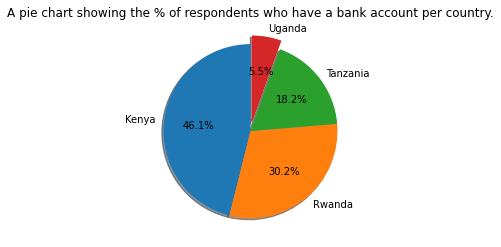

In [27]:
# Creating a pie chart that illustrates the number of people in each country that have a bank account

# Filtering out the 'Yes' value from column Has a Bank account
bank = finance_df[finance_df['has_a_bank_account']== 'Yes']

explode = (0,0,0,0.1)
p = bank.groupby('country')['has_a_bank_account'].count()

labels = bank['country'].unique()

plt.title('A pie chart showing the % of respondents who have a bank account per country.')
plt.pie(p,labels=labels,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True);



*   Kenya has the highest number of people with bank accounts. 
*   Uganda has the lowest number of people with bank accounts.




#### 1.7.1.3 Bar Charts

Text(0.5, 0, 'Has a bank account')

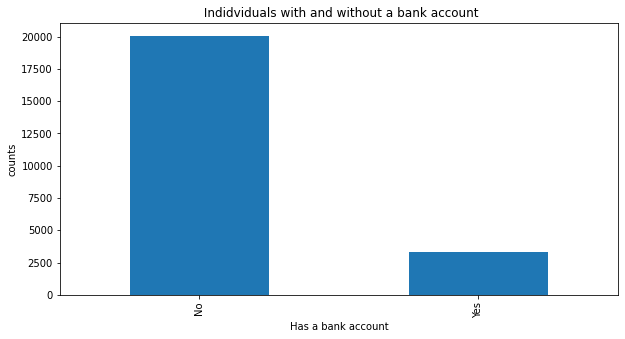

In [28]:
# how many individuals have or do not have bank accounts?
# 

plt.figure(figsize=(10,5))
finance_df['has_a_bank_account'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title(' Indidviduals with and without a bank account')
plt.xlabel('Has a bank account')

Majority of the respondents did not have a bank account.

Text(0.5, 0, 'Education level')

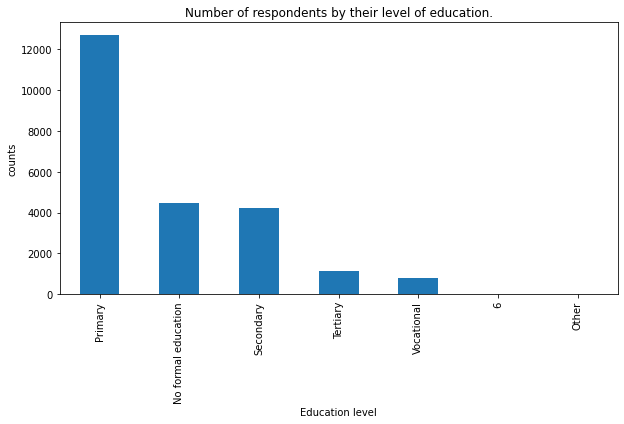

In [29]:
# Creating a bar chart that illustrates the number of respondents
# by their level of education.

plt.figure(figsize=(10,5))
finance_df['level_of_education'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title('Number of respondents by their level of education.')
plt.xlabel('Education level')

The majority of the responders had only completed primary school.

Text(0.5, 0, 'Gender')

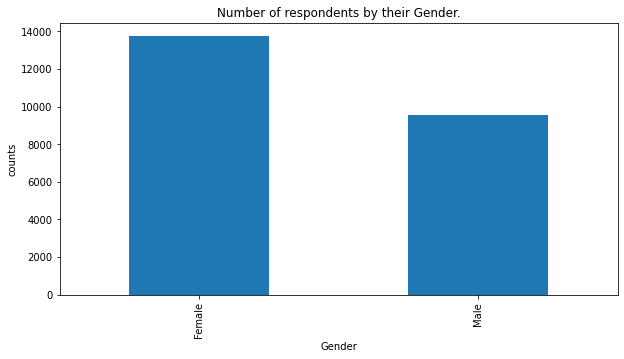

In [30]:
# Creating a bar chart that illustrates the number of respondents
# by their Gender
plt.figure(figsize=(10,5))
finance_df['gender_of_respondent'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title('Number of respondents by their Gender.')
plt.xlabel('Gender')

The bar chart shows that most of the responders were Female.

Text(0.5, 0, 'Tpe of Job')

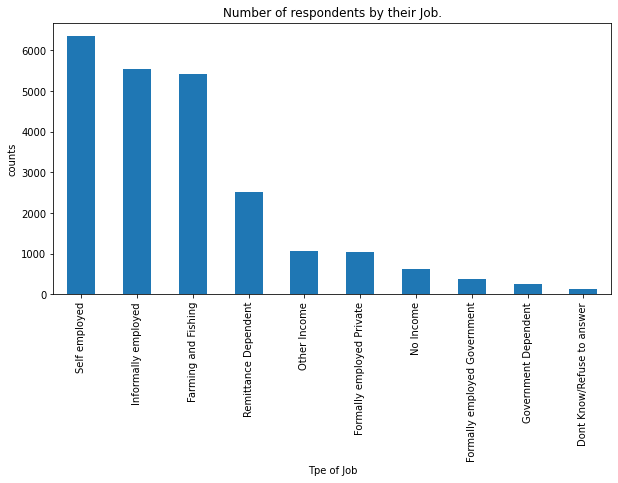

In [31]:
# Creating a bar chart that illustrates the employment status

plt.figure(figsize=(10,5))
finance_df['type_of_job'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title('Number of respondents by their Job.')
plt.xlabel('Tpe of Job')

Majority of the respondents were self-employed and few didn't know/refused to answer.

#### 1.7.1.4 Histograms

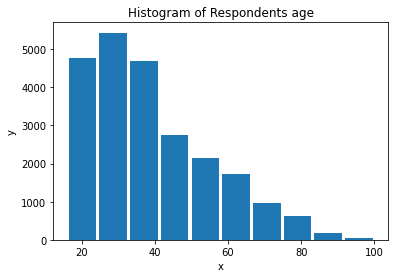

In [32]:
# Creating a histogram of respondents age
age = finance_df['respondent_age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Respondents age') 
plt.show()



*   The histogram shows us that the age distribution is skewed to the right.
This is because the tail is long to the right side.
*   Most respondents were of the age between 20 and 40



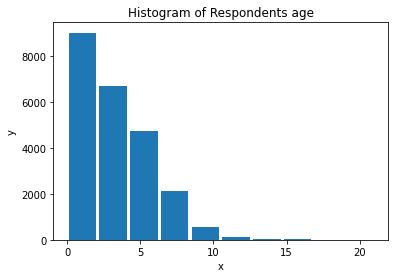

In [33]:
# Creating a histogram of respondents house hold size
house = finance_df['household_size']

plt.hist(house, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Respondents age') 
plt.show()



*   Because the tail is long to the right, the household size distribution is skewed to the right, as shown by the histogram.
*   The histogram shows that most households were of size 2 to 3.



#### 1.7.1.5 Measures of Central tendency

##### **Mean**

In [34]:
 # Finding the mean of the respondens' age
 finance_df['respondent_age'].mean()

38.80550914621085

The mean for the interviwees was 39.

In [35]:
 # Finding the mean of the respondents'house hold size
 finance_df['household_size'].mean()

3.6886432763569377

The mean for the respondents house hold size was 3.6

##### **Mode**

In [36]:
# Finding the mode of the respondens' age
finance_df['respondent_age'].mode()

0    30.0
dtype: float64

30 is the most common age.

In [37]:
 # Finding the mode of the respondents'house hold size
finance_df['household_size'].mode()

0    2.0
dtype: float64

2 is the most common household size

##### **Median**

In [38]:
# Finding the median of the respondens' age
finance_df['respondent_age'].median()

35.0

The middle observation for the age of the respondents was 36,when the data was arranged in descending/ascending order.

In [39]:
# Finding the median of the respondents'house hold size
finance_df['household_size'].median()

3.0

The middle observation for the household size of the respondents was 3,when the data was arranged in descending/ascending order.

#### 1.7.1.6 Measures of dispersion

##### **Range**

In [40]:
# Range of the age
age_max = finance_df['respondent_age'].max()
age_min = finance_df['respondent_age'].min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

100.0 16.0
84.0


In [41]:
# Range of the household_size
size_max = finance_df.household_size.max()
size_min = finance_df.household_size.min()

size_range = size_max - size_min

print(size_max,size_min)
print(size_range)

21.0 0.0
21.0


##### **Quantile**

In [42]:
# Quantiles of the age

finance_df['respondent_age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [43]:
# Quantiles of the household_size

finance_df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

##### **Standard Deviation**

In [44]:
# Average distance between each obseravtion from the mean. 
# I.e., how data is spread out from mean. 
# A low std dev indicates that the data points tend to be close to the mean of the data set, 
# A high std dev indicates that the data points are spread out over a wider range of values.

In [45]:
# Standard Deviation of the age

finance_df.respondent_age.std()

16.51980349804178

In [46]:
# Standard Deviation of the household_size

finance_df.household_size.std()

2.2811835250351495

##### **Variance**

In [47]:
# square of average distance between each observation and mean. 
# I.e. square of standard deviation. 
# It is a measure of how dispersed or spread out the set is, 

# If a data set has a variance of zero, then every member of it is the same. 
# If the variance is high, especially as a ratio to the mean,
# then the data have some very large dis-similarities amongst its members.

In [48]:
# Variance of the age

finance_df.respondent_age.var()

272.90390761391353

In [49]:
# Variance of the household_size

finance_df.household_size.var()

5.20379827489179

##### **Skewness**

In [50]:
# A measure of the asymmetry of the probability distribution of a real-valued 
# random variable about its mean. 
# In a perfect normal distribution, the tails on either side of the curve are 
# exact mirror images of each other.
# A negative value means the distribution is negatively skewed.....or...skewed to the left
# A positive value means the distribution is positively skewed.....or...skewed to the right

In [51]:
# Skewness of the age

finance_df.respondent_age.skew()



0.840661747532081

The respondent age distribution is skewed to the right since its skewness is a positive value.This was also seen in the histogram above on visualizations: long right tail.

In [52]:
# Skewness of the household_size

finance_df.household_size.skew()


0.9741086837897069

The household size distribution is skewed to the right since its skewness is a positive value.This was also seen in the histogram above on visualizations: long right tail.

##### **Kurtosis**

In [53]:
# A measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.

# If the kurtosis is close to 0, then a normal distribution is often assumed.
# These is called mesokurtic distributions. 

# If the kurtosis is less than zero, then the distribution has light tails .
# These is called a platykurtic distribution.  

# If the kurtosis is greater than zero, then the distribution has heavier tails.
# This is called a leptokurtic distribution.

In [54]:
# Kurtosis of the age

finance_df.respondent_age.kurt()

0.09844652254807196

In [55]:
# Kurtosis of the household_size

finance_df.household_size.kurt()

1.1538690689335573

## **1.7.2 Bivariate Analysis**

##### **1.7.2.1 Numerical & Numerical Analysis**


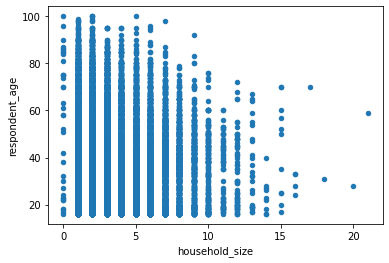

In [56]:
# A scatter plot comparing the household size and the age of respondent.
finance_df.plot(x = 'household_size', y = 'respondent_age', kind = 'scatter')

There is no correlation between age and household size in the dataset as the points are scattered throughout the graph.

#### **1.7.2.2 Categorical & Numerical**

Text(0, 0.5, 'Distribution across the population')

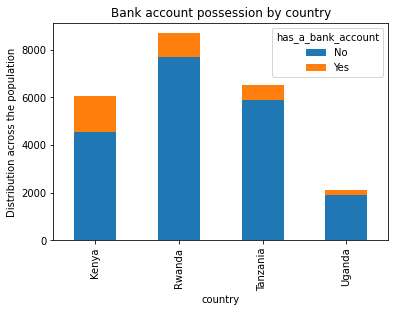

In [57]:
# Analysis by country
# Creating a frequency table for the countries and bank account 

# plot chart for the frequencies represented in the crosstab dataframe 
finance_df.groupby('country')['has_a_bank_account'].value_counts().unstack().plot.bar(stacked=True)
# labelling axes and formatting chart
plt.title("Bank account possession by country")
plt.ylabel("Distribution across the population")

Text(0, 0.5, 'Distribution across the population')

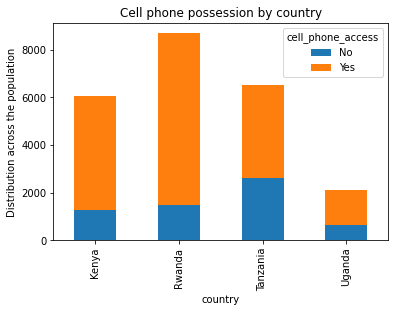

In [58]:
# Accessibility to cell phones by country
# plot chart for the frequencies represented in the crosstab dataframe 
finance_df.groupby('country')['cell_phone_access'].value_counts().unstack().plot.bar(stacked=True)
# labelling axes and formatting chart
plt.title("Cell phone possession by country")
plt.ylabel("Distribution across the population")

Text(0, 0.5, 'Distribution across the population')

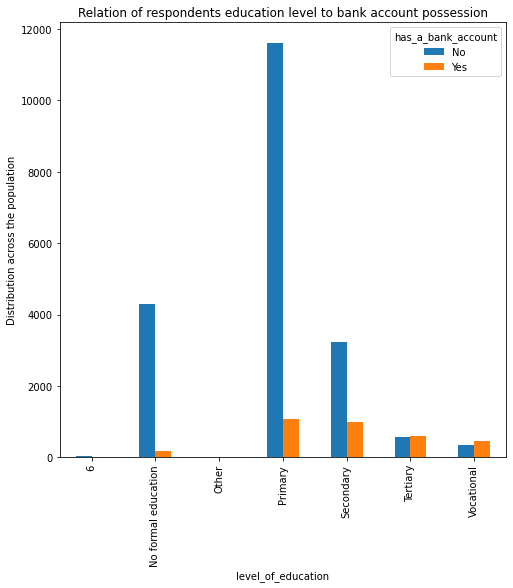

In [59]:
# Relation of respondents education level to bank account possession
ebank = pd.crosstab(index=finance_df['level_of_education'], columns=finance_df['has_a_bank_account'])
# plot chart
ebank.plot(kind="bar", figsize=(8,8))
# format & label chart
plt.title("Relation of respondents education level to bank account possession")
plt.ylabel("Distribution across the population")

Text(0, 0.5, 'Distribution across the population')

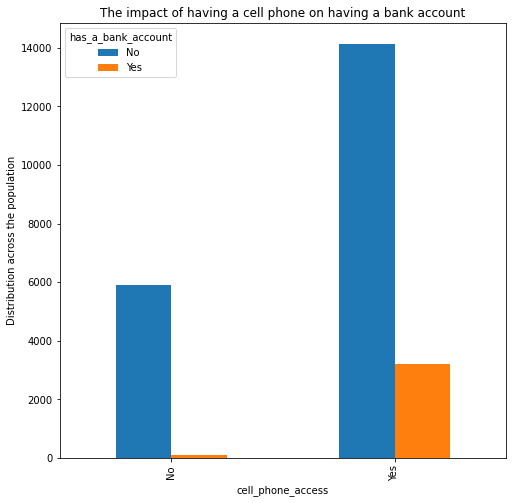

In [60]:
# The impact of having a cell phone on having a bank account
cbank = pd.crosstab(index=finance_df['cell_phone_access'], columns=finance_df['has_a_bank_account'])
# plotting chart
cbank.plot(kind="bar", figsize=(8,8))
# labelling chart
plt.title("The impact of having a cell phone on having a bank account")
plt.ylabel("Distribution across the population")

##### **1.7.2.3 Correlation**

In [61]:
# Calculating the Pearson Correlation Co-efficient
coeff = finance_df['household_size'].corr(finance_df['respondent_age'])
print(coeff)

-0.11970919507762415


In [62]:
# Calculating the pearson coefficient of the entire dataframe
finance_df.corr()

,household_size,respondent_age
household_size,1.000000,-0.119709
respondent_age,-0.119709,1.000000


Because the correlation coefficient between Age and Household is -0.12, Age and Household have a very weak negative correlation.

## **1.7.3 Multivariate Analysis**

##### **1.7.3.1 Principal Component Analysis (PCA)**

In [63]:
# To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)

# Pandas has a function which can turn a categorical variable into a series of zeros and ones, 

# This makes them a lot easier to quantify and compare.


In [64]:
# Converting the categories into dummy variables with ones and zeros

dummy = pd.get_dummies(finance_df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other,level_of_education_Primary,level_of_education_Secondary,level_of_education_Tertiary,level_of_education_Vocational,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
# PCA, is a statistical technique to convert high dimensional data to low dimensional data by 
# selecting the most important features that capture maximum information about the dataset.

# The features are selected on the basis of variance that they cause in the output. 
# The feature that causes highest variance is the first principal component. 
# The feature that is responsible for second highest variance is considered 
# the second principal component, and so on.
# Note: principal components do not have any correlation with each other.

# PCA can only be applied to numeric data. 
# Therefore, categorical features are required to be converted into numerical 
# features before PCA can be applied. (already done in the dummies above)

In [66]:
# Since we’ve created a whole new dataframe, 
# in order to compare it to our original dataframe,
# we’re going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1.

# concatenating 

finance_df1 = pd.concat([finance_df, dummy], axis = 1)
finance_df1.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other,level_of_education_Primary,level_of_education_Secondary,level_of_education_Tertiary,level_of_education_Vocational,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
# Preprocessing steps

# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, and corresponding label: y.

x= finance_df1.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = finance_df1['has_a_bank_account']

In [68]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [69]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set(x). 
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [70]:
# Step 4: Applying PCA
# Performing PCA using Python's Scikit-Learn library. 

# PCA depends only upon the feature set and not the label data. 
# PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods.

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [71]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance 
# caused by each of the principal components. 

# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.01571182e-01, 7.75016466e-02, 6.29607676e-02, 5.48358686e-02,
       5.09218780e-02, 4.51259628e-02, 4.04936493e-02, 3.82667911e-02,
       3.52636305e-02, 3.28846437e-02, 3.27418083e-02, 2.89861835e-02,
       2.85930991e-02, 2.72665192e-02, 2.68467760e-02, 2.65986653e-02,
       2.64985298e-02, 2.61296878e-02, 2.58245262e-02, 2.57552674e-02,
       2.56176971e-02, 2.46075591e-02, 2.35296509e-02, 2.15080575e-02,
       2.08755158e-02, 1.78688451e-02, 1.61089933e-02, 1.33201491e-02,
       1.16279955e-02, 9.86845381e-03, 3.09345243e-31, 6.43162246e-32,
       3.99697722e-32, 3.47884327e-32, 2.89006584e-32, 2.70184475e-32,
       1.00363377e-32, 8.12123320e-33])

In [72]:
# step 6:
# Using the 27 Principal Components to train our algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=27)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [73]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [74]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4007    1]
 [ 661    0]]
Accuracy 0.8582137502677233


From the output we see that with 27 features, the random forest algorithm is able to correctly predict 3904 out of 4546 instances, resulting in 85.82% accuracy.

##### **1.7.3.2 Discriminant Analysis(LDA)**

In [75]:
# It is a simple and powerful linear transformation. 
# I t is most commonly used as dimensionality reduction technique in the pre-processing step 
# for machine learning applications. 

# The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional
# space with good class-separability in order avoid overfitting and reduce computational costs.


In [76]:
# Step 1:
# First step is to divide dataset into features and corresponding labels, 
# then divide the resultant dataset into training and test sets. 
X = finance_df1.iloc[:, 11:].values
y = finance_df1.iloc[:, 1].values

In [77]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [78]:
y

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [79]:
# Step 2: Dividing data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
# Step 3: Feature scaling
# Performing feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
# Step 4: Peforming LDA
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA. 
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=27)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# The n_components parameter of the LDA, refers to the number of linear discriminates 
# that we want to retrieve. 
# We fit and transform methods to retrieve the linear discriminants.
# Incase of LDA, the transform method takes two parameters: the z_train and the s_train. 
# This reflects the fact that LDA takes the output class labels into account while
# selecting the linear discriminants.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [82]:
# Step 5: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [83]:
# Step 6: Evaluating the Performance
# Evaluating performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.31%, 
# which is slightly greater than the accuracy achieved with one principal component, which was 85.82%.

[[3955   53]
 [ 493  168]]
Accuracy0.8830584707646177


# 1.8 Implementing the solution

**Following a univariate analysis, it was discovered that:**

•	A huge population of the respondents in the four countries did not have or use a bank account.
•	Most individuals live in rural areas

•	Most individuals had access to a cell phone.

•	The most popular family/household size is 2

•	Most respondents were of the age between 20 and 40

•	The mean of the ages of all respondents was 39.

•	A large population of the respondents were female.

•	The majority of the interviewees were household heads, with a small number of non-relatives of the household head.

•	Most individuals in the population were married and the next most highest were single individuals.

•	Kenya has the highest number of people with bank accounts.

•	Uganda has the lowest number of people with bank accounts.

•	Most respondents had only studied upto primary level of education. Very few had studied upto the tertiary level.

•	A huge number of the respondent population were self-employed


**Following a Bivariate analysis, it was discovered that:**

•	Rwanda recorded a huge number of individuals without a bank account. Kenya however, recorded a relatively high number of individuals possessing a bank account.

•	Most of those who had access to cell phones had a bank account or use one.

•	There is no correlation between age and household size in the dataset as the points are scattered throughout the graph.


# 1.9 Challenge the solution

We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.31%, 
which is slightly greater than the accuracy achieved with one principal component, which was 85.82%.

As a result, using LDA reduction techniques to conduct our study was a somewhat superior option.